In [22]:
import pandas as pd

pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

In [23]:
path_output = '/nfs/home/vyasa/projects/proj_off/data_off/clarify/spanish_comorbidity/new/output/'

df = pd.read_csv(path_output+'train_MEV_ents_jaccard.csv', encoding='utf-8')

In [24]:
df.head(5)

,value,value_witht_abbr,replacement,google,deepl,google_abbr,deepl_abbr,google_withst_num,deepl_withst_num,google_abbr_withst_num,deepl_abbr_withst_num,haveAbbr,stop_words_google_len,stop_words_deepl_len,stop_words_google_abbr_len,stop_words_deepl_abbr_len,ents,google_ents,deepl_ents,google_abbr_ents,deepl_abbr_ents,ents_len,google_ents_len,deepl_ents_len,google_abbr_ents_len,deepl_abbr_ents_len,mev_cui_score,google_cui_score,deepl_cui_score,google_abbr_cui_score,deepl_abbr_cui_score,mev_cui_len,google_cui_len,deepl_cui_len,google_abbr_cui_len,deepl_abbr_cui_len,cui_jacD_mev_google,cui_jacD_mev_deepl,cui_jacD_mev_google_withst_num,cui_jacD_mev_deepl_withst_num,cui_jacD_mev_google_A,cui_jacD_mev_deepl_A,cui_jacD_mev_google_withst_num_A,cui_jacD_mev_deepl_withst_num_A,cui_jacD_mev_google_abbr,cui_jacD_mev_deepl_abbr,cui_jacD_mev_google_abbr_withst_num,cui_jacD_mev_deepl_abbr_withst_num,cui_jacD_mev_google_abbr_A,cui_jacD_mev_deepl_abbr_A,cui_jacD_mev_google_abbr_withst_num_A,cui_jacD_mev_deepl_abbr_withst_num_A
0,Gastritis crÛnica,Gastritis crÛnica,Chronic gastritis,Chronic gastritis,Chronic gastritis,Chronic gastritis,Chronic gastritis,Chronic gastritis,Chronic gastritis,Chronic gastritis,Chronic gastritis,False,0,0,0,0,"(Chronic gastritis,)","(Chronic gastritis,)","(Chronic gastritis,)","(Chronic gastritis,)","(Chronic gastritis,)",1,1,1,1,1,"[[('C0085695', 0.9999999403953552), ('C0267146', 0.8952037692070007), ('C0341194', 0.8572458028793335), ('C1275591', 0.8363184332847595), ('C0017154', 0.8076196908950806)]]","[[('C0085695', 0.9999999403953552), ('C0267146', 0.8952037692070007), ('C0341194', 0.8572458028793335), ('C1275591', 0.8363184332847595), ('C0017154', 0.8076196908950806)]]","[[('C0085695', 0.9999999403953552), ('C0267146', 0.8952037692070007), ('C0341194', 0.8572458028793335), ('C1275591', 0.8363184332847595), ('C0017154', 0.8076196908950806)]]","[[('C0085695', 0.9999999403953552), ('C0267146', 0.8952037692070007), ('C0341194', 0.8572458028793335), ('C1275591', 0.8363184332847595), ('C0017154', 0.8076196908950806)]]","[[('C0085695', 0.9999999403953552), ('C0267146', 0.8952037692070007), ('C0341194', 0.8572458028793335), ('C1275591', 0.8363184332847595), ('C0017154', 0.8076196908950806)]]",5,5,5,5,5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Sarcoma PleomÛrfico Pectoral Mayor,Sarcoma PleomÛrfico Pectoral Mayor,Pectoralis major pleomorphic sarcoma,Pectoralis major pleomorphic sarcoma,Pectoralis major pectoralis pleomûrphic sarcoma,Pectoralis major pleomorphic sarcoma,Pectoralis major pleomûrfic sarcoma,Pectoralis major pleomorphic sarcoma,Pectoralis major pectoralis pleomûrphic sarcoma,Pectoralis major pleomorphic sarcoma,Pectoralis major pleomûrfic sarcoma,False,0,0,0,0,"(Pectoralis, pleomorphic sarcoma)","(Pectoralis, pleomorphic sarcoma)","(Pectoralis, pectoralis pleomûrphic sarcoma)","(Pectoralis, pleomorphic sarcoma)","(Pectoralis, pleomûrfic sarcoma)",2,2,2,2,2,"[[('C0030747', 1.0), ('C3674152', 0.9002574682235718), ('C3675353', 0.8634646534919739), ('C3678382', 0.8554095029830933), ('C1521735', 0.8199975490570068)], [('C1261358', 0.9260651469230652), ('C0205825', 0.8506943583488464), ('C0598607', 0.8253174424171448), ('C1514164', 0.7949097156524658), ('C0334463', 0.7733286619186401)]]","[[('C0030747', 1.0), ('C3674152', 0.9002574682235718), ('C3675353', 0.8634646534919739), ('C3678382', 0.8554095029830933), ('C1521735', 0.8199975490570068)], [('C1261358', 0.9260651469230652), ('C0205825', 0.8506943583488464), ('C0598607', 0.8253174424171448), ('C1514164', 0.7949097156524658), ('C0334463', 0.7733286619186401)]]","[[('C0030747', 1.0), ('C3674152', 0.9002574682235718), ('C3675353', 0.8634646534919739), ('C3678382', 0.8554095029830933), ('C1521735', 0.8199975490570068)], [('C1261358', 0.7086301445960999)]]","[[('C0030747', 1.0), ('C3674152', 0.9002574682235718), ('C3675353', 0.8634646534919739), ('C3678382', 0.8554095029830933), ('C1521735', 0.8199975490570068)], [('C1261358', 0.9260651469230

In [25]:
df['IsValueReplaced'] = df['value']!=df['value_witht_abbr']

In [26]:
cols_l = df.columns.tolist()
df_new = df[cols_l[0:2]+cols_l[-1:]+cols_l[2:-1]]
df = df_new

In [27]:
df.columns

Index(['value', 'value_witht_abbr', 'IsValueReplaced', 'replacement', 'google',
       'deepl', 'google_abbr', 'deepl_abbr', 'google_withst_num',
       'deepl_withst_num', 'google_abbr_withst_num', 'deepl_abbr_withst_num',
       'haveAbbr', 'stop_words_google_len', 'stop_words_deepl_len',
       'stop_words_google_abbr_len', 'stop_words_deepl_abbr_len', 'ents',
       'google_ents', 'deepl_ents', 'google_abbr_ents', 'deepl_abbr_ents',
       'ents_len', 'google_ents_len', 'deepl_ents_len', 'google_abbr_ents_len',
       'deepl_abbr_ents_len', 'mev_cui_score', 'google_cui_score',
       'deepl_cui_score', 'google_abbr_cui_score', 'deepl_abbr_cui_score',
       'mev_cui_len', 'google_cui_len', 'deepl_cui_len', 'google_abbr_cui_len',
       'deepl_abbr_cui_len', 'cui_jacD_mev_google', 'cui_jacD_mev_deepl',
       'cui_jacD_mev_google_withst_num', 'cui_jacD_mev_deepl_withst_num',
       'cui_jacD_mev_google_A', 'cui_jacD_mev_deepl_A',
       'cui_jacD_mev_google_withst_num_A', 'cui_jacD_

/nfs/home/vyasa/software/pkg/miniconda3/envs/scispacy/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'ents_len'}>,
        <AxesSubplot:title={'center':'google_ents_len'}>,
        <AxesSubplot:title={'center':'deepl_ents_len'}>,
        <AxesSubplot:title={'center':'google_abbr_ents_len'}>,
        <AxesSubplot:title={'center':'deepl_abbr_ents_len'}>]],
      dtype=object)

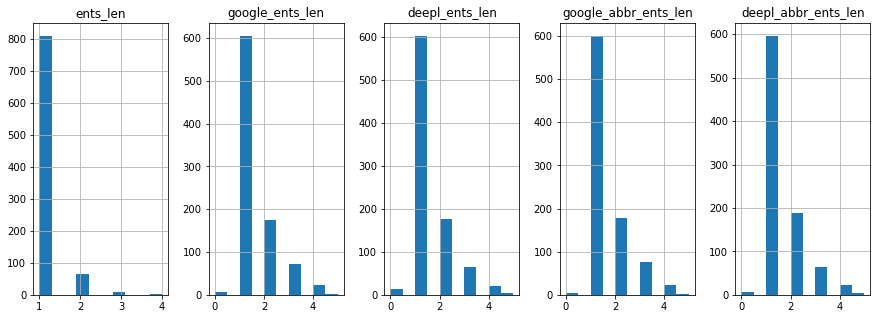

In [28]:
df[['ents_len', 'google_ents_len', 'deepl_ents_len', 'google_abbr_ents_len', 'deepl_abbr_ents_len']].hist(figsize=(15,5), layout=(1,5))

array([[<AxesSubplot:title={'center':'stop_words_google_len'}>,
        <AxesSubplot:title={'center':'stop_words_deepl_len'}>,
        <AxesSubplot:title={'center':'stop_words_google_abbr_len'}>,
        <AxesSubplot:title={'center':'stop_words_deepl_abbr_len'}>]],
      dtype=object)

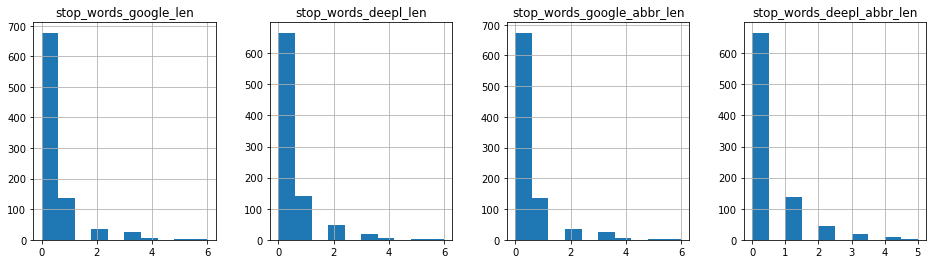

In [29]:
df[['stop_words_google_len', 'stop_words_deepl_len', 'stop_words_google_abbr_len', 'stop_words_deepl_abbr_len']].hist(figsize=(16,4), layout=(1,4))

array([[<AxesSubplot:title={'center':'mev_cui_len'}>,
        <AxesSubplot:title={'center':'google_cui_len'}>,
        <AxesSubplot:title={'center':'deepl_cui_len'}>,
        <AxesSubplot:title={'center':'google_abbr_cui_len'}>,
        <AxesSubplot:title={'center':'deepl_abbr_cui_len'}>]],
      dtype=object)

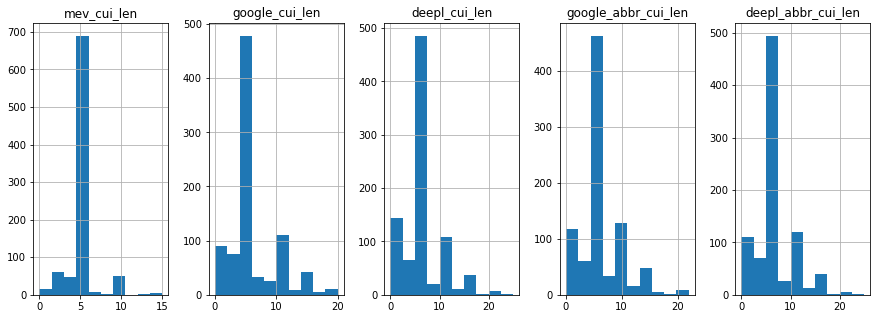

In [30]:
df[['mev_cui_len','google_cui_len', 'deepl_cui_len', 'google_abbr_cui_len', 'deepl_abbr_cui_len']].hist(figsize=(15,5), layout=(1,5))

/nfs/home/vyasa/software/pkg/miniconda3/envs/scispacy/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'cui_jacD_mev_google'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_deepl'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_google_abbr'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_deepl_abbr'}>,
        <AxesSubplot:>]], dtype=object)

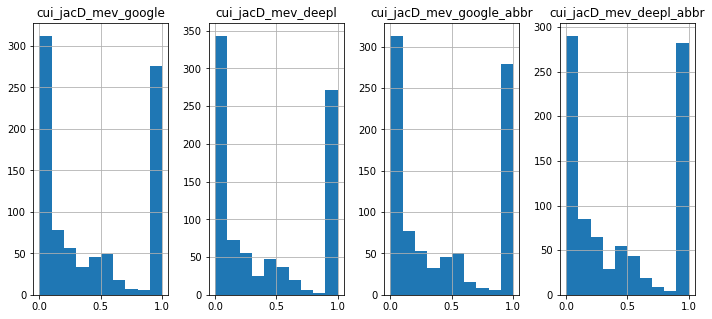

In [31]:
df[['cui_jacD_mev_google', 'cui_jacD_mev_deepl', 'cui_jacD_mev_google_abbr', 'cui_jacD_mev_deepl_abbr']].hist(figsize=(15,5), layout=(1,5))

array([[<AxesSubplot:title={'center':'cui_jacD_mev_google_A'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_deepl_A'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_google_abbr_A'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_deepl_abbr_A'}>]],
      dtype=object)

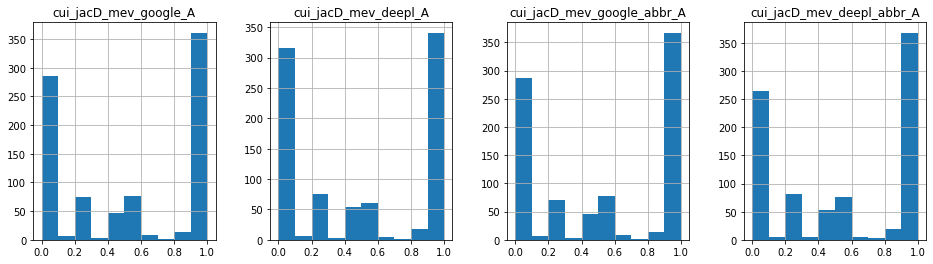

In [32]:
df[['cui_jacD_mev_google_A', 'cui_jacD_mev_deepl_A', 'cui_jacD_mev_google_abbr_A', 'cui_jacD_mev_deepl_abbr_A']].hist(figsize=(16,4), layout=(1,4))

array([[<AxesSubplot:title={'center':'cui_jacD_mev_google_withst_num'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_deepl_withst_num'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_google_abbr_withst_num'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_deepl_abbr_withst_num'}>]],
      dtype=object)

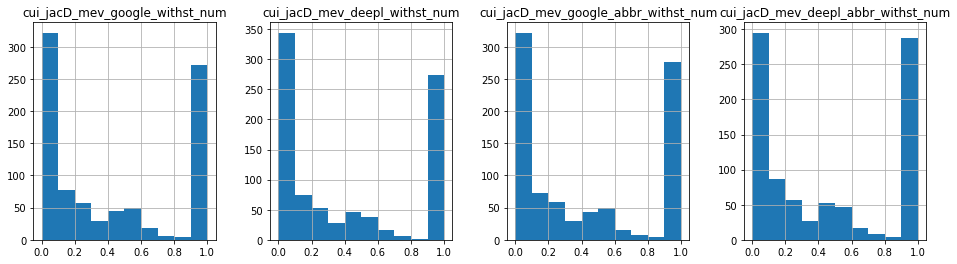

In [33]:
df[['cui_jacD_mev_google_withst_num', 'cui_jacD_mev_deepl_withst_num', 'cui_jacD_mev_google_abbr_withst_num', 'cui_jacD_mev_deepl_abbr_withst_num']].hist(figsize=(16,4), layout=(1,4))

array([[<AxesSubplot:title={'center':'cui_jacD_mev_google_withst_num_A'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_deepl_withst_num_A'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_google_abbr_withst_num_A'}>,
        <AxesSubplot:title={'center':'cui_jacD_mev_deepl_abbr_withst_num_A'}>]],
      dtype=object)

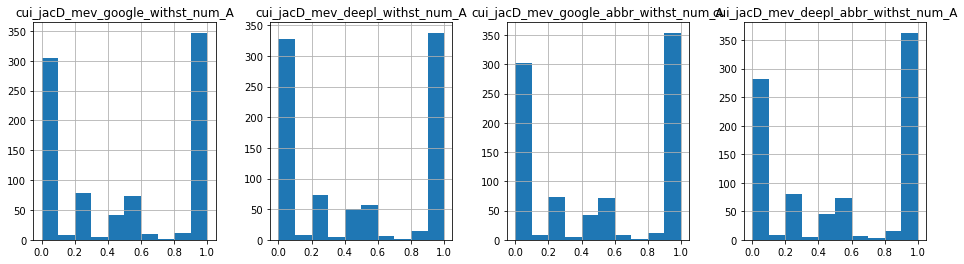

In [34]:
df[['cui_jacD_mev_google_withst_num_A', 'cui_jacD_mev_deepl_withst_num_A', 'cui_jacD_mev_google_abbr_withst_num_A', 'cui_jacD_mev_deepl_abbr_withst_num_A']].hist(figsize=(16,4), layout=(1,4))

In [35]:
df[['ents_len', 'google_ents_len', 'deepl_ents_len', 'google_cui_len', 'deepl_cui_len','mev_cui_len', 'cui_jacD_mev_google', 'cui_jacD_mev_deepl','cui_jacD_mev_google_withst_num', 'cui_jacD_mev_deepl_withst_num']].describe()

,ents_len,google_ents_len,deepl_ents_len,google_cui_len,deepl_cui_len,mev_cui_len,cui_jacD_mev_google,cui_jacD_mev_deepl,cui_jacD_mev_google_withst_num,cui_jacD_mev_deepl_withst_num
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,881.000000,881.000000,881.000000
mean,1.094104,1.435374,1.416100,5.894558,5.710884,5.038549,0.431003,0.412783,0.422306,0.411539
std,0.332140,0.774755,0.781665,3.820192,3.779579,1.817649,0.423591,0.427058,0.424736,0.428710
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,0.285714,0.250000,0.250000,0.250000
75%,1.000000,2.000000,2.000000,7.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,5.000000,5.000000,20.000000,25.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df[['ents_len', 'google_abbr_ents_len', 'deepl_abbr_ents_len', 'google_abbr_cui_len', 'deepl_abbr_cui_len','mev_cui_len', 'cui_jacD_mev_google_abbr', 'cui_jacD_mev_deepl_abbr','cui_jacD_mev_google_abbr_withst_num', 'cui_jacD_mev_deepl_abbr_withst_num']].describe()

,ents_len,google_abbr_ents_len,deepl_abbr_ents_len,google_abbr_cui_len,deepl_abbr_cui_len,mev_cui_len,cui_jacD_mev_google_abbr,cui_jacD_mev_deepl_abbr,cui_jacD_mev_google_abbr_withst_num,cui_jacD_mev_deepl_abbr_withst_num
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,881.000000,882.000000
mean,1.094104,1.455782,1.445578,6.071429,6.010204,5.038549,0.433631,0.441255,0.425464,0.441483
std,0.332140,0.786359,0.785718,3.843195,3.708889,1.817649,0.424844,0.421497,0.425983,0.425518
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,0.285714,0.333333,0.250000,0.333333
75%,1.000000,2.000000,2.000000,7.000000,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,5.000000,5.000000,22.000000,25.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df[['cui_jacD_mev_google_withst_num_A', 'cui_jacD_mev_deepl_withst_num_A', 'cui_jacD_mev_google_A', 'cui_jacD_mev_deepl_A']].describe()

,cui_jacD_mev_google_withst_num_A,cui_jacD_mev_deepl_withst_num_A,cui_jacD_mev_google_A,cui_jacD_mev_deepl_A
count,881.000000,881.000000,881.000000,881.000000
mean,0.500739,0.482341,0.520433,0.491990
std,0.443408,0.447248,0.441369,0.445223
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.400000,0.500000,0.400000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [38]:
df[['cui_jacD_mev_google_abbr_withst_num_A', 'cui_jacD_mev_deepl_abbr_withst_num_A', 'cui_jacD_mev_google_abbr_A', 'cui_jacD_mev_deepl_abbr_A']].describe()

,cui_jacD_mev_google_abbr_withst_num_A,cui_jacD_mev_deepl_abbr_withst_num_A,cui_jacD_mev_google_abbr_A,cui_jacD_mev_deepl_abbr_A
count,881.000000,881.000000,881.000000,881.000000
mean,0.506532,0.522386,0.525414,0.535630
std,0.444682,0.441038,0.442633,0.436853
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [39]:
# df[df['mev_cui_len']==0][['table_name', 'column_name', 'value', 'replacement']].to_csv('../../../data_off/clarify/spanish_comorbidity/train_MEV_left.csv', encoding='utf-8')

In [40]:
df[df['mev_cui_len']==0]

,value,value_witht_abbr,IsValueReplaced,replacement,google,deepl,google_abbr,deepl_abbr,google_withst_num,deepl_withst_num,google_abbr_withst_num,deepl_abbr_withst_num,haveAbbr,stop_words_google_len,stop_words_deepl_len,stop_words_google_abbr_len,stop_words_deepl_abbr_len,ents,google_ents,deepl_ents,google_abbr_ents,deepl_abbr_ents,ents_len,google_ents_len,deepl_ents_len,google_abbr_ents_len,deepl_abbr_ents_len,mev_cui_score,google_cui_score,deepl_cui_score,google_abbr_cui_score,deepl_abbr_cui_score,mev_cui_len,google_cui_len,deepl_cui_len,google_abbr_cui_len,deepl_abbr_cui_len,cui_jacD_mev_google,cui_jacD_mev_deepl,cui_jacD_mev_google_withst_num,cui_jacD_mev_deepl_withst_num,cui_jacD_mev_google_A,cui_jacD_mev_deepl_A,cui_jacD_mev_google_withst_num_A,cui_jacD_mev_deepl_withst_num_A,cui_jacD_mev_google_abbr,cui_jacD_mev_deepl_abbr,cui_jacD_mev_google_abbr_withst_num,cui_jacD_mev_deepl_abbr_withst_num,cui_jacD_mev_google_abbr_A,cui_jacD_mev_deepl_abbr_A,cui_jacD_mev_google_abbr_withst_num_A,cui_jacD_mev_deepl_abbr_withst_num_A
478,sd IAVD,sd IAVD,True,Sd iavd,Sd iavd,Sd iavd,Sd iavd,Arvd sd,Sd iavd,Sd iavd,Sd iavd,Arvd sd,False,0,0,0,0,"(Sd iavd,)","(Sd iavd,)","(Sd iavd,)","(Sd iavd,)","(Arvd,)",1,1,1,1,1,[[]],[[]],[[]],[[]],"[[('C0349788', 1.0), ('C1710291', 1.0), ('C1156292', 0.7549833655357361), ('C3810643', 0.7549833655357361)]]",0,0,0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN


In [41]:
# Stop words
df.groupby(['stop_words_google_len'])['ents_len','google_ents_len','google_cui_len', 'cui_jacD_mev_google', 'cui_jacD_mev_google_A'].describe()

ipykernel_launcher:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ents_len                                               \
                         count      mean       std  min  25%  50%  75%  max   
stop_words_google_len                                                         
0                        677.0  1.067947  0.257648  1.0  1.0  1.0  1.0  3.0   
1                        136.0  1.147059  0.394957  1.0  1.0  1.0  1.0  3.0   
2                         35.0  1.228571  0.645606  1.0  1.0  1.0  1.0  4.0   
3                         25.0  1.360000  0.757188  1.0  1.0  1.0  1.0  3.0   
4                          7.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
5                          1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0   
6                          1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0   

                      google_ents_len                                          \
                                count      mean       std  min  25%  50%  75%   
stop_words_google_len                                                           
0                               677.0  1.174298  0.479510  0.0  1.0  1.0  1.0   
1                               136.0  1.926471  0.756526  0.0  1.0  2.0  2.0   
2                                35.0  2.942857  0.802308  2.0  2.0  3.0  3.0   
3                                25.0  3.040000  0.789515  2.0  3.0  3.0  3.0   
4                                 7.0  3.571429  0.534522  3.0  3.0  4.0  4.0   
5                                 1.0  3.000000       NaN  3.0  3.0  3.0  3.0   
6                                 1.0  2.000000       NaN  2.0  2.0  2.0  2.0   

                           google_cui_len                                   \
                       max          count       mean       std   min   25%   
stop_words_google_len                                                        
0                      4.0          677.0   4.778434  2.757659   0.0   4.0   
1                      4.0          136.0   8.095588  3.885164   0.0   5.0   
2                      5.0           35.0  12.600000  4.230144   4.0  10.0   
3                      5.0           25.0  11.880000  4.245782   5.0  10.0   
4                      4.0            7.0  14.571429  3.457222   9.0  13.0   
5                      3.0            1.0  13.000000       NaN  13.0  13.0   
6                      2.0            1.0  10.000000       NaN  10.0  10.0   

                                        cui_jacD_mev_google            \
                        50%   75%   max               count      mean   
stop_words_google_len                                                   
0                       5.0   5.0  20.0               676.0  0.471858   
1                       8.0  10.0  20.0               136.0  0.312583   
2                      13.0  15.0  20.0                35.0  0.267110   
3                      12.0  15.0  20.0                25.0  0.328522   
4                      15.0  16.5  19.0                 7.0  0.095010   
5                      13.0  13.0  13.0                 1.0  0.000000   
6                      10.0  10.0  10.0                 1.0  0.000000   

                                                                         \
                            std  min  25%       50%       75%       max   
stop_words_google_len                                                     
0                      0.437453  0.0  0.0  0.360390  1.000000  1.000000   
1                      0.355884  0.0  0.0  0.166667  0.500000  1.000000   
2                      0.280619  0.0  0.0  0.250000  0.500000  1.000000   
3                      0.374339  0.0  0.0  0.166667  0.714286  1.000000   
4                      0.176892  0.0  0.0  0.000000  0.105263  0.454545   
5                           NaN  0.0  0.0  0.000000  0.000000  0.000000   
6                           NaN  0.0  0.0  0.000000  0.000000  0.000000   

                      cui_jacD_mev_google_A                                \
                                      count      mean       std  min  25%   
sto

In [42]:
df.groupby(['stop_words_deepl_len'])['deepl_ents_len','deepl_cui_len', 'cui_jacD_mev_deepl','cui_jacD_mev_deepl_A'].describe()

ipykernel_launcher:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


deepl_ents_len                                          \
                              count      mean       std  min  25%  50%  75%   
stop_words_deepl_len                                                          
0                             666.0  1.141141  0.472925  0.0  1.0  1.0  1.0   
1                             141.0  1.900709  0.710181  1.0  1.0  2.0  2.0   
2                              46.0  2.804348  0.833188  2.0  2.0  3.0  3.0   
3                              18.0  3.055556  0.872604  1.0  3.0  3.0  4.0   
4                               7.0  3.285714  1.112697  2.0  2.5  3.0  4.0   
5                               3.0  4.000000  1.000000  3.0  3.5  4.0  4.5   
6                               1.0  2.000000       NaN  2.0  2.0  2.0  2.0   

                          deepl_cui_len                                    \
                      max         count       mean       std   min    25%   
stop_words_deepl_len                                                        
0                     4.0         666.0   4.567568  2.749562   0.0   4.00   
1                     4.0         141.0   7.964539  3.751973   0.0   5.00   
2                     5.0          46.0  11.239130  4.222610   5.0   8.25   
3                     4.0          18.0  12.388889  4.539226   5.0  10.25   
4                     5.0           7.0  12.000000  5.744563   2.0  10.00   
5                     5.0           3.0  12.666667  0.577350  12.0  12.50   
6                     2.0           1.0  10.000000       NaN  10.0  10.00   

                                       cui_jacD_mev_deepl                      \
                       50%   75%   max              count      mean       std   
stop_words_deepl_len                                                            
0                      5.0   5.0  20.0              665.0  0.463495  0.442678   
1                      7.0  10.0  20.0              141.0  0.264567  0.335734   
2                     10.0  14.0  25.0               46.0  0.303876  0.344448   
3                     12.0  15.0  20.0               18.0  0.226879  0.292842   
4                     11.0  15.5  20.0                7.0  0.010204  0.026997   
5                     13.0  13.0  13.0                3.0  0.000000  0.000000   
6                     10.0  10.0  10.0                1.0  0.000000       NaN   

                                                              \
                      min  25%       50%       75%       max   
stop_words_deepl_len                                           
0                     0.0  0.0  0.333333  1.000000  1.000000   
1                     0.0  0.0  0.142857  0.470588  1.000000   
2                     0.0  0.0  0.225000  0.500000  1.000000   
3                     0.0  0.0  0.104167  0.333333  1.000000   
4                     0.0  0.0  0.000000  0.000000  0.071429   
5                     0.0  0.0  0.000000  0.000000  0.000000   
6                     0.0  0.0  0.000000  0.000000  0.000000   

                     cui_jacD_mev_deepl_A                                \
                                    count      mean       std  min  25%   
stop_words_deepl_len                                                      
0                                   665.0  0.516033  0.447573  0.0  0.0   
1                                   141.0  0.410740  0.417658  0.0  0.0   
2                                    46.0  0.487681  0.461739  0.0  0.0   
3                                    18.0  0.537963  0.458536  0.0  0.0   
4                                     7.0  0.035714  0.094491  0.0  0.0   
5                                     3.0  0.000000  0.000000  0.0  0.0   
6                                     1.0  0.000000       NaN  0.0  0.0   

                                           
                           50%  75%   max  
stop_words_deepl_len                       
0                     0.500000  1.0  1.00  
1                     0.250000  1.0  1.00  
2                     0.466667  1.0 

In [43]:
df.groupby(['haveAbbr'])['google_ents_len','deepl_ents_len','google_cui_len','deepl_cui_len'].describe()

ipykernel_launcher:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


google_ents_len                                               \
                   count      mean       std  min  25%  50%  75%  max   
haveAbbr                                                                
False              882.0  1.435374  0.774755  0.0  1.0  1.0  2.0  5.0   

         deepl_ents_len                                             \
                  count    mean       std  min  25%  50%  75%  max   
haveAbbr                                                             
False             882.0  1.4161  0.781665  0.0  1.0  1.0  2.0  5.0   

         google_cui_len                                                \
                  count      mean       std  min  25%  50%  75%   max   
haveAbbr                                                                
False             882.0  5.894558  3.820192  0.0  5.0  5.0  7.0  20.0   

         deepl_cui_len                                                
                 count      mean       std  min  25%  50%  75%   max  
haveAbbr                                                              
False            882.0  5.710884  3.779579  0.0  5.0  5.0  6.0  25.0

In [44]:
df.groupby(['haveAbbr'])['cui_jacD_mev_google','cui_jacD_mev_deepl','cui_jacD_mev_google_A', 'cui_jacD_mev_deepl_A'].describe()

ipykernel_launcher:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


cui_jacD_mev_google                                               \
                       count      mean       std  min  25%       50%  75%   
haveAbbr                                                                    
False                  881.0  0.431003  0.423591  0.0  0.0  0.285714  1.0   

              cui_jacD_mev_deepl                                           \
          max              count      mean       std  min  25%   50%  75%   
haveAbbr                                                                    
False     1.0              881.0  0.412783  0.427058  0.0  0.0  0.25  1.0   

              cui_jacD_mev_google_A                                          \
          max                 count      mean       std  min  25%  50%  75%   
haveAbbr                                                                      
False     1.0                 881.0  0.520433  0.441369  0.0  0.0  0.5  1.0   

              cui_jacD_mev_deepl_A                                              
          max                count     mean       std  min  25%  50%  75%  max  
haveAbbr                                                                        
False     1.0                881.0  0.49199  0.445223  0.0  0.0  0.4  1.0  1.0

In [45]:
df.groupby(['IsValueReplaced'])['google_ents_len','deepl_ents_len','google_cui_len','deepl_cui_len'].describe()

ipykernel_launcher:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


google_ents_len                                               \
                          count      mean       std  min  25%  50%  75%  max   
IsValueReplaced                                                                
False                      37.0  1.513514  0.901284  0.0  1.0  1.0  2.0  3.0   
True                      845.0  1.431953  0.769176  0.0  1.0  1.0  2.0  5.0   

                deepl_ents_len                                               \
                         count      mean       std  min  25%  50%  75%  max   
IsValueReplaced                                                               
False                     37.0  1.351351  0.888701  0.0  1.0  1.0  2.0  3.0   
True                     845.0  1.418935  0.777114  0.0  1.0  1.0  2.0  5.0   

                google_cui_len                                                \
                         count      mean       std  min  25%  50%  75%   max   
IsValueReplaced                                                                
False                     37.0  4.459459  3.990228  0.0  1.0  5.0  5.0  15.0   
True                     845.0  5.957396  3.802666  0.0  5.0  5.0  7.0  20.0   

                deepl_cui_len                                                
                        count      mean       std  min  25%  50%  75%   max  
IsValueReplaced                                                              
False                    37.0  3.648649  3.318435  0.0  0.0  4.0  5.0  13.0  
True                    845.0  5.801183  3.774540  0.0  5.0  5.0  6.0  25.0

In [46]:
df.groupby(['IsValueReplaced'])['cui_jacD_mev_google','cui_jacD_mev_deepl','cui_jacD_mev_google_A', 'cui_jacD_mev_deepl_A'].describe()

ipykernel_launcher:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


cui_jacD_mev_google                                          \
                              count      mean       std  min  25%       50%   
IsValueReplaced                                                               
False                          37.0  0.189220  0.278589  0.0  0.0  0.076923   
True                          844.0  0.441603  0.425808  0.0  0.0  0.333333   

                               cui_jacD_mev_deepl                           \
                      75%  max              count      mean       std  min   
IsValueReplaced                                                              
False            0.222222  1.0               37.0  0.207443  0.335057  0.0   
True             1.000000  1.0              844.0  0.421785  0.428553  0.0   

                                          cui_jacD_mev_google_A            \
                 25%   50%       75%  max                 count      mean   
IsValueReplaced                                                             
False            0.0  0.00  0.333333  1.0                  37.0  0.294595   
True             0.0  0.25  1.000000  1.0                 844.0  0.530333   

                                                   cui_jacD_mev_deepl_A  \
                      std  min  25%  50%  75%  max                count   
IsValueReplaced                                                           
False            0.372638  0.0  0.0  0.2  0.5  1.0                 37.0   
True             0.441690  0.0  0.0  0.5  1.0  1.0                844.0   

                                                              
                     mean       std  min  25%  50%  75%  max  
IsValueReplaced                                               
False            0.278378  0.398703  0.0  0.0  0.0  0.5  1.0  
True             0.501354  0.445022  0.0  0.0  0.4  1.0  1.0